In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Part A
## Skeleton Finding Funtion

In [3]:
def morphological_skeleton(image):
    global count
    count = 0
    # Convert image to binary
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    binary_image = binary_image // 255  # Convert to 0/1

    # Structuring elements
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    skel = np.zeros(binary_image.shape, np.uint8)

    while True:
        count += 1
        # Erode the image
        eroded = cv2.erode(binary_image, element)
        # Open the eroded image
        temp = cv2.dilate(eroded, element)
        # Subtract open from eroded image
        temp = cv2.subtract(binary_image, temp)
        # Bitwise OR the result with the current skeleton
        skel = cv2.bitwise_or(skel, temp)
        # Set the eroded image to the binary image for the next iteration
        binary_image = eroded.copy()
        # If the image is empty, break from the loop
        if cv2.countNonZero(binary_image) == 0:
            break

    return skel * 255, count

## Input Samples and the Results

39 68 62


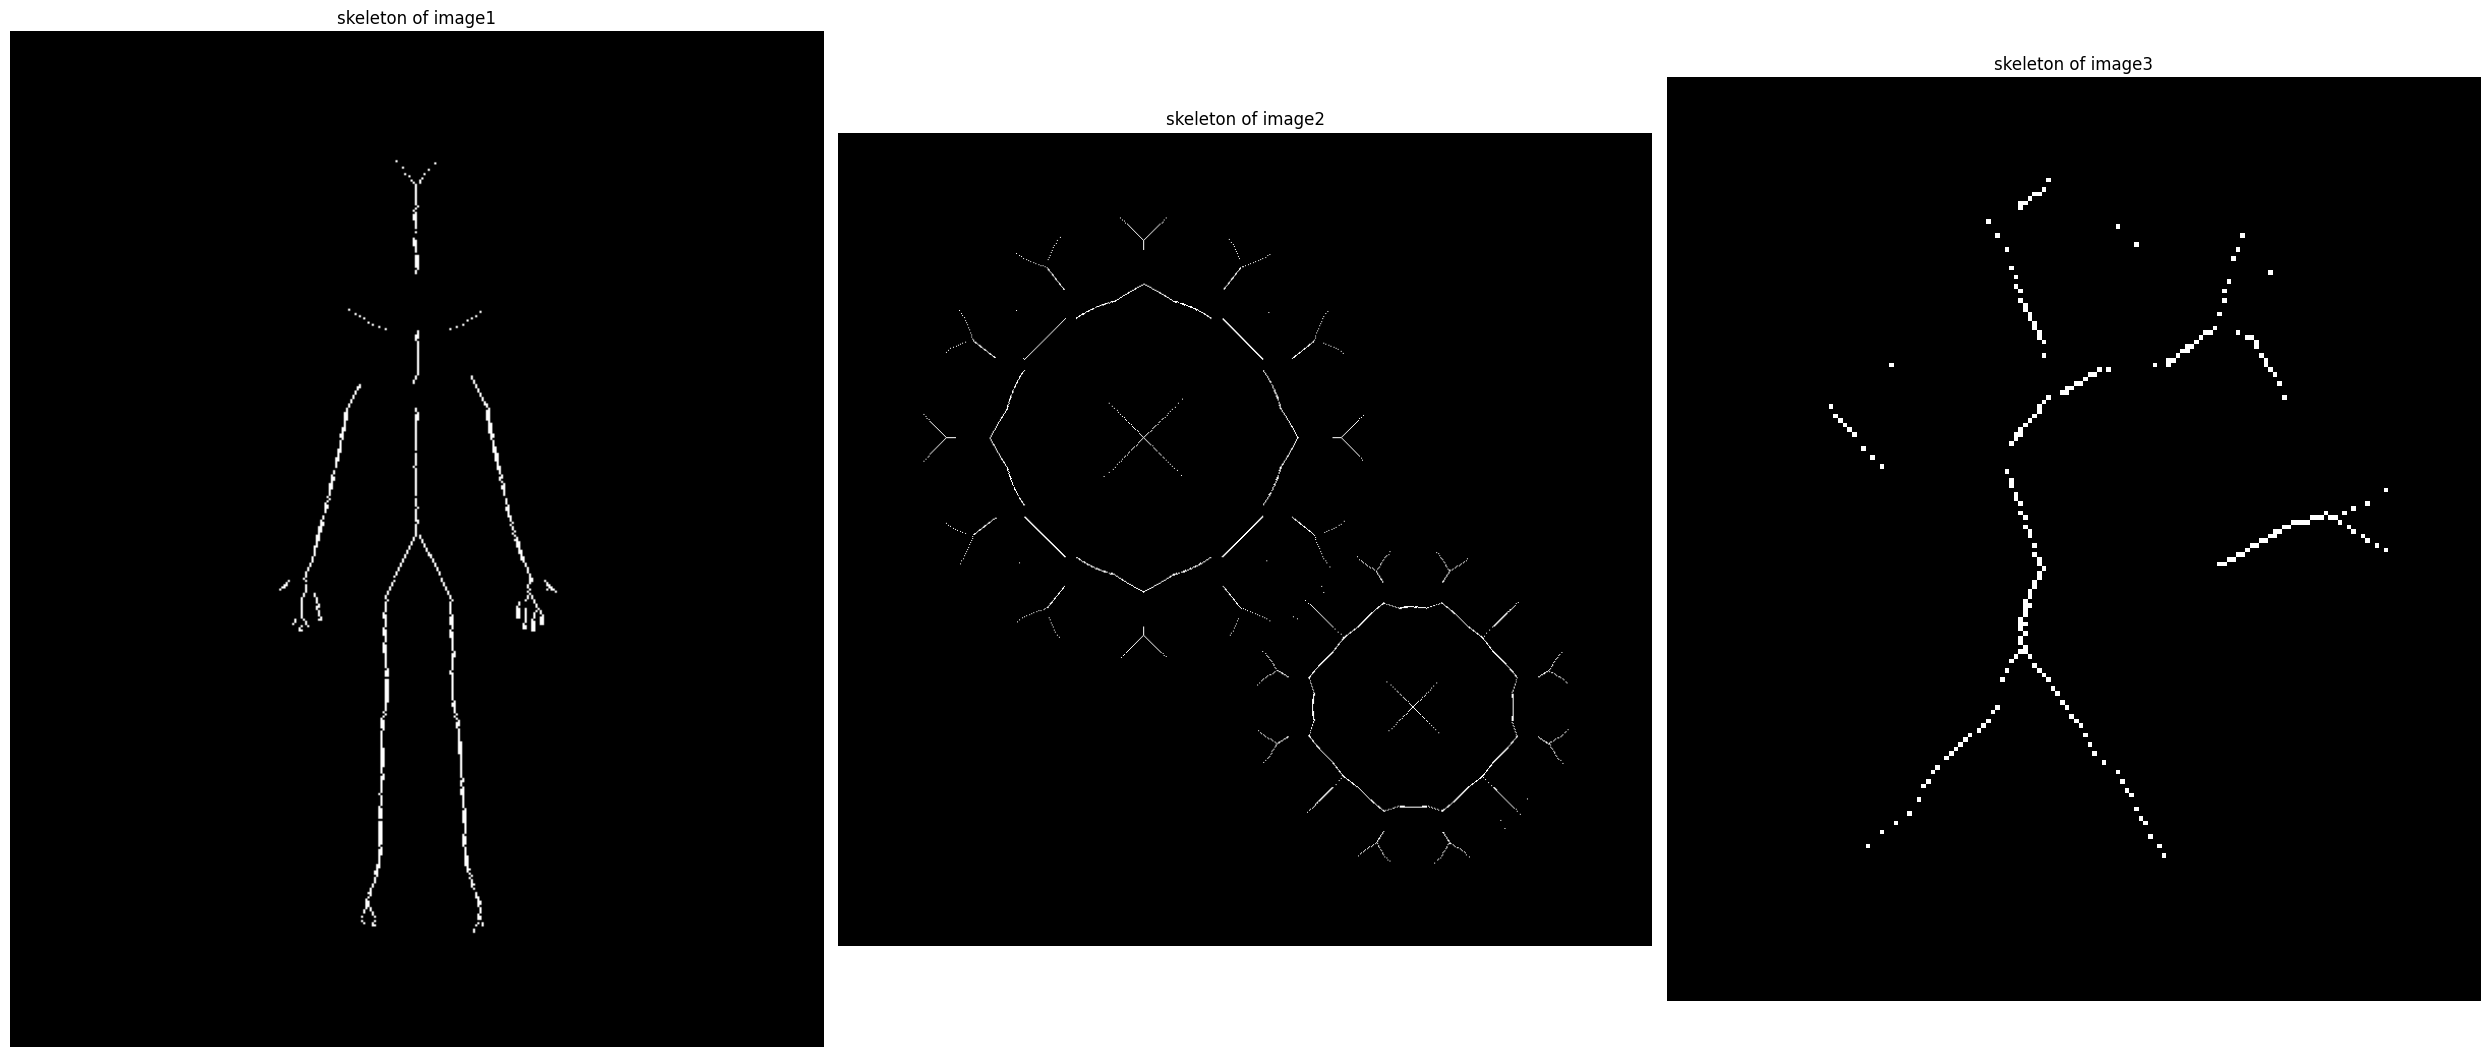

In [4]:
# Load images
image1 = cv2.imread('./images/q8_5.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('./images/q8_6.png', cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('./images/q8_7.png', cv2.IMREAD_GRAYSCALE)


# Perform skeletonization
skeleton1, count1 = morphological_skeleton(image1)
skeleton2, count2 = morphological_skeleton(image2)
skeleton3, count3 = morphological_skeleton(image3)

print (count1, count2, count3)
# Show the skeletons
plt.figure(figsize=(25, 16), dpi=100)

# Plot the first skeleton
plt.subplot(1, 3, 1)
plt.imshow(skeleton1, cmap='gray')  # Overlay the segmented regions with jet colormap
plt.title('skeleton of image1')
plt.axis('off')

# Plot the second skeleton
plt.subplot(1, 3, 2)
plt.imshow(skeleton2, cmap='gray')  # Overlay the segmented regions with jet colormap
plt.title('skeleton of image2')
plt.axis('off')

# Plot the third skeleton
plt.subplot(1, 3, 3)
plt.imshow(skeleton3, cmap='gray')  # Overlay the segmented regions with jet colormap
plt.title('skeleton of image3')
plt.axis('off')


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Part B
## Declaration of Reconstruction

In [5]:
def reconstruct_from_skeleton(skeleton, iterations):
    # Start with the skeleton
    reconstructed = skeleton.copy()
    # Get the structuring element
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    for _ in range(iterations):
        # Perform dilation to reconstruct the image
        reconstructed = cv2.dilate(reconstructed, element)
    
    return reconstructed

## Reconstruction of Preveious Skeletons

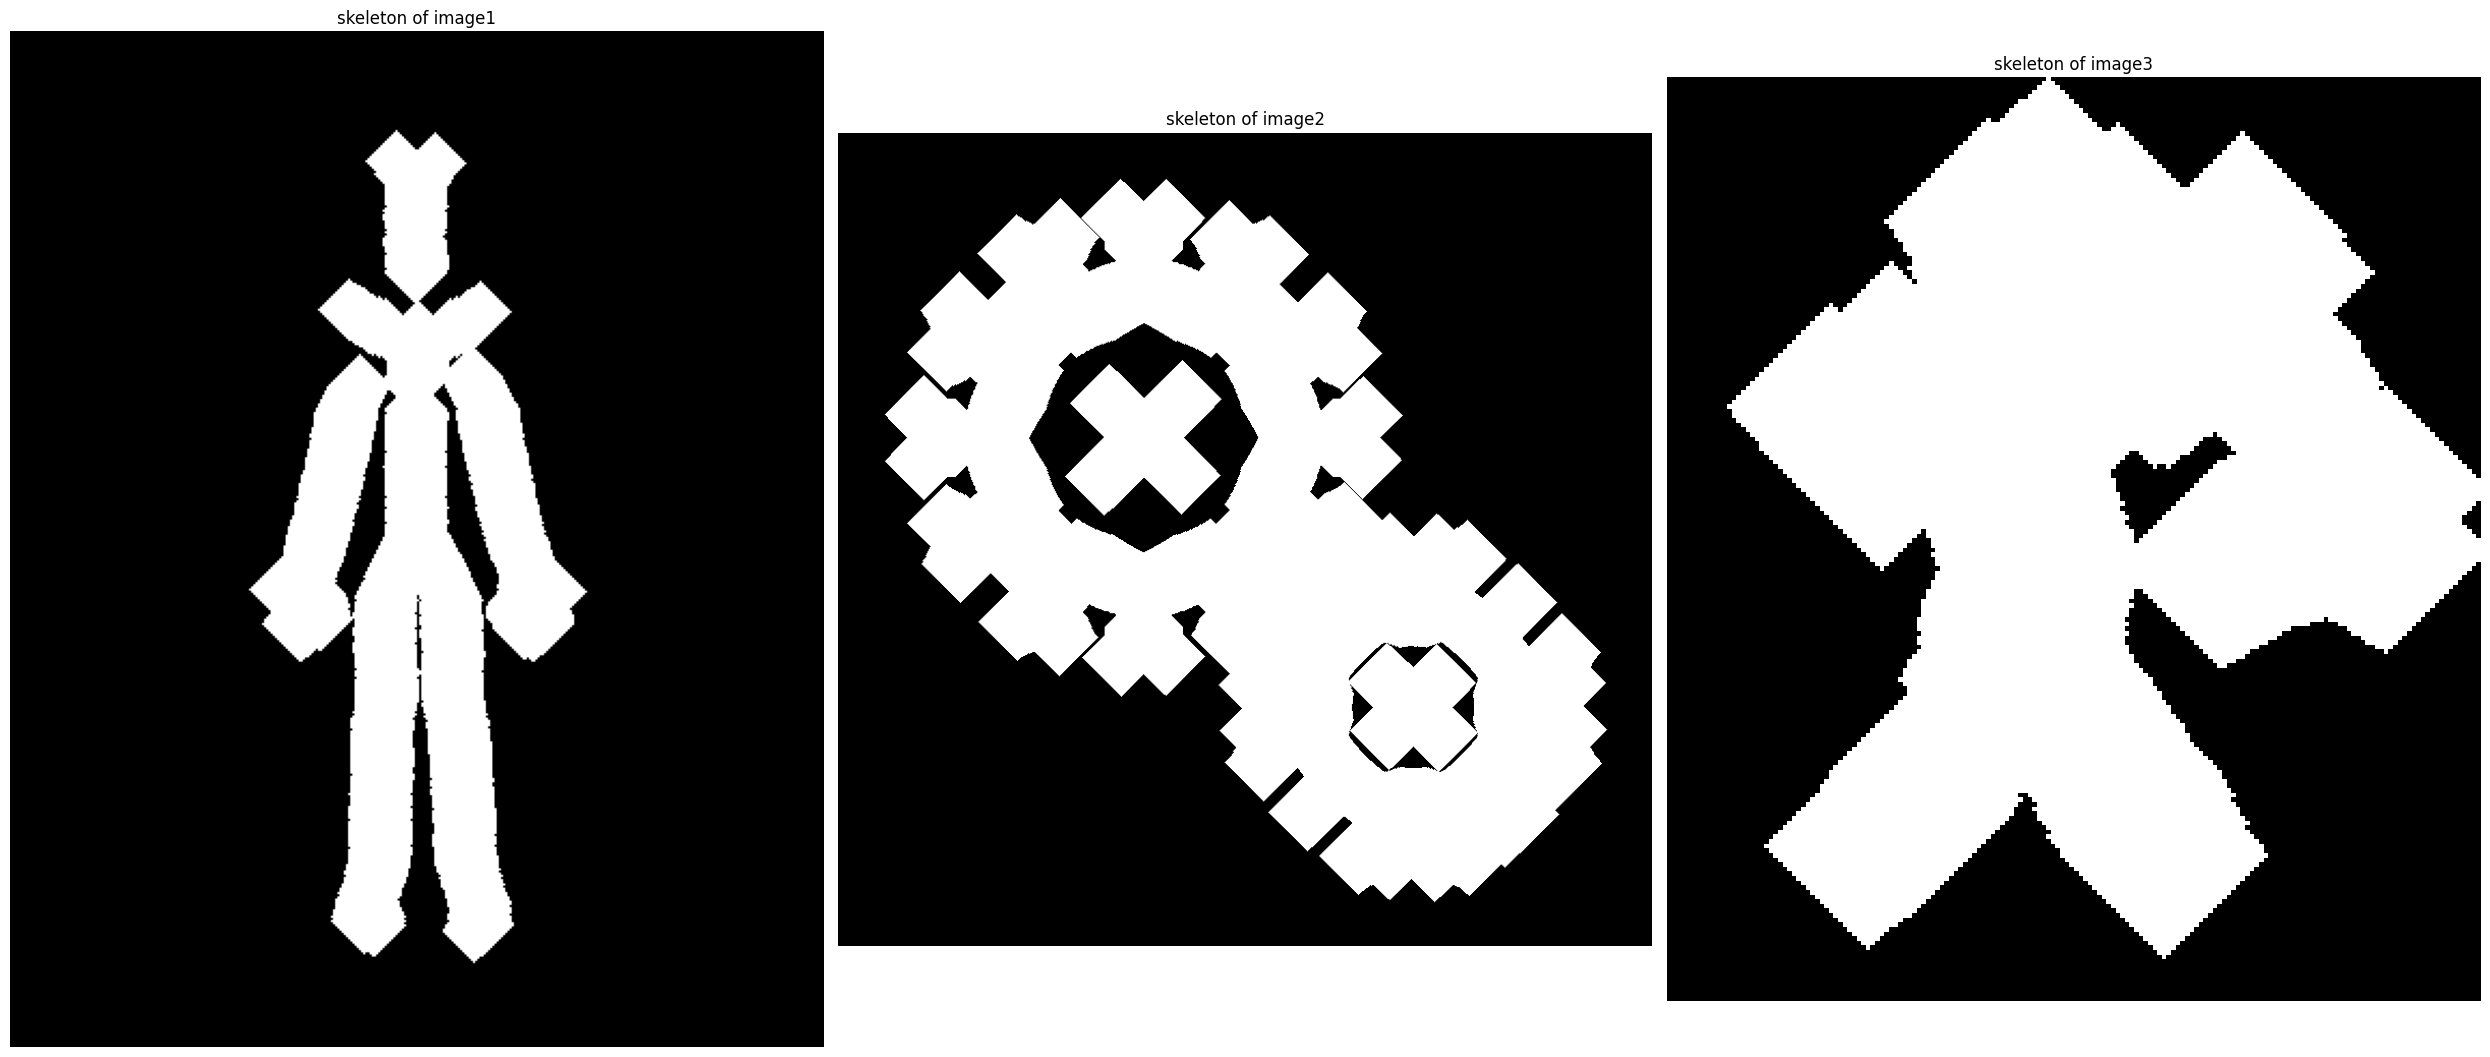

In [9]:
reconstructed_image1 = reconstruct_from_skeleton(skeleton1, count1-25)
reconstructed_image2 = reconstruct_from_skeleton(skeleton2, count2-30)
reconstructed_image3 = reconstruct_from_skeleton(skeleton3, count3-40)

# Show the reconstructed skeletons
plt.figure(figsize=(25, 16), dpi=100)

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(reconstructed_image1, cmap='gray')  # Overlay the segmented regions with jet colormap
plt.title('skeleton of image1')
plt.axis('off')

# Plot the gray image
plt.subplot(1, 3, 2)
plt.imshow(reconstructed_image2, cmap='gray')  # Overlay the segmented regions with jet colormap
plt.title('skeleton of image2')
plt.axis('off')

# Plot the thresholded image
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image3, cmap='gray')  # Overlay the segmented regions with jet colormap
plt.title('skeleton of image3')
plt.axis('off')


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()